In [79]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# random : 이 라이브러리는 난수를 생성하고 난수 기반 연산을 수행하는 함수를 제공하고 리스트를 섞거나 무작위 샘플을 생성하거나 무작위 요소를 선택하는 등의 작업에 사용할 수 있다.
# numpy (이름이 np로 import) : 이는 파이썬에서 수치 계산을 위한 라이브러리이다.
# matplotlib.pyplot (이름이 plt로 import) : 이 라이브러리는 파이썬에서 시각화와 플롯을 생성해준다.
# scipy.stats(이름이 stats로 import) : 이는 scipy 라이브러리의 모듈로, 다양한 통계 함수와 분포를 제공합니다. 확률 계산, 통계적 검정, 데이터에 대한 확률 분포의 적합 등을 위한 메서드를 포함하고 있다.

In [80]:
class Stock: #Stock이라는 class 생성
    def __init__(self, Expected_Return, Sigma, S0, T ,size):   # 멤버변수로 Expected_Return, Sigma, S0, T, size 설정
        self.Expected_Return = Expected_Return                 # Expected_Return - 기대수익률
        self.Sigma = Sigma                                     # Sigma - 변동성
        self.S0 = S0                                           # S0 - 주식초기가격
        self.T = T                                             # T - 만기
        self.size = size                                       # size -주식 sample의 개수

######### Stock_Price 함수 --> Size의 개수만큼 주가를 보여주는 함수 ######### 

    def Stock_Price(self, T, seed, size):          # 멤버 함수 : Stock_Price(주식가격), 멤버변수 : T, seed, size
        np.random.seed(seed)                       # seed 값 고정해주기 위한 코드
        z = np.random.standard_normal(size)        # z : 표준정규분포상에서 무작위로 추출해주는 난수 생성
        
        ST = self.S0 * np.exp(((self.Expected_Return - 1/2 * self.Sigma ** 2) * T) + self.Sigma * np.sqrt(T) * z)
                                                  # 기하 브라운 운동으 따르는 T년후의 주가를 구하는 공식
        return ST                                # T년 후의 주가(ST)를 size 개수만큼 나열한 배열을 리턴해준다.

######### Statistics 함수 --> 표본평균과 표본분산을 구해주는 함수 ######### 

    def Statistics(self, T, seed, size):                     # 멤버 함수 : Statistics, 멤버변수 : T, seed, size
        np.random.seed(seed)
        Mean = self.S0 * np.exp(self.Expected_Return * T)    # Mean이라는 변수에 평균을 구하는 식 설정
        Variance = self.S0**2 * np.exp(2 * self.Expected_Return * T) * (np.exp(self.Sigma ** 2 * T)-1)  #Variance라는 변수에 분산을 구하는 식 설정
        ST = self.Stock_Price(T,seed,size)                   # ST에 위에서 설정한 Stock_Price라는 함수를 가져옴

        Sample_Mean = np.mean(ST)                            # Sample_Mean(표본평균) : ST의 평균, 즉 표본으로 추출한 ST의 평균을 구하는 식
        Sample_Variance = np.var(ST,ddof =1)                 # Sample_Varinace(표본분산) : ST의 분산, 마찬가지로 표본으로 추출한 ST의 분산을 구하는 식
                                                             # 표본분산의 불편추정량을 위해, ddof = 1로 설정해줌으로써 자유도를 고려해주었다. 
                                                             # 자유도를 고려해주는 이유는 모표준편차와 표본 표준편차에서 반드시 발생하는 괴리율을 줄이기 위함이다.
        return Sample_Mean, Sample_Variance                 # Sample_Mean(표본평균)과 Sample_Variance(표본분산)을 리턴해준다.
 

 ########  Show_Convergence 함수 --> 주가의 샘플인 size의 개수가 증가할 때마다 Sample_Mean(표본평균)과 Sample_Variance(표본분산)이 
#########  평균과 분산에 수렴을 하는지 눈에 보이기 쉽게 그래프로 보여주기 위한 함수 

    def Show_Convergence(self):                                        # 멤버 함수 : Show_Convergence
        Sample_Mean_Array=[]                                           # Sample_Mean_Array에 빈 리스트를 만들어준다
        Sample_Variance_Array=[]                                       # Sample_Variance_Array에 빈 리스트를 만들어준다
        Mean = self.S0 * np.exp(self.Expected_Return * self.T)         # Mean : 평균을 구하는 식
        Variance = self.S0**2 * np.exp(2 * self.Expected_Return * self.T) * (np.exp(self.Sigma ** 2 * self.T)-1)   # Variance : 분산을 구하는 식
        
        
        for i in range(1, self.size+1):                               # for문을 통해 1부터 size의 개수만큼 돌리기 위함.
            np.random.seed(5594)

            Means, Variances = self.Statistics(self.T,5594,i)         # Means, Variances에 각각 Statistics 함수의 리턴값인 Sample_Mean(표본평균)과 Sample_Variance(표본분산)을 할당시켜준다.
            
            Sample_Mean_Array.append(Means)                           # Sample_Mean_Array라는 빈 리스트에 위에서 구한 Means를 for문을 통해 주가샘플의 개수만큼 표본평균값들을 append 시켜준다.
            Sample_Variance_Array.append(Variances)                   # 마찬가지로 Sample_Variance_Array라는 빈 리스트에 Varinaces를 주가샘플의 개수만큼 표본분산 값들을 append 시켜준다.
        
    
           
        
        x = np.arange(1, self.size +1)                                # x는 x축 값으로 사용할 배열을 생성 
        plt.plot(x, Sample_Mean_Array, label='Sampel_Mean')           # plt.plot 함수 -> x와 Sample_Mean_Array(주식 size만큼 나타낸 표본평균 배열)를 연결시켜줌
        plt.axhline(Mean, color='r', linestyle='--', label='Mean')    # plt.axhline -> Mean(평균값)에 해당하는 수평선(빨강색)을 그려준다.
        plt.xlabel('Sample Size')                                     # X축에 'Sample Size' 이름 설정
        plt.ylabel('Value')                                           # Y축에 'Value' 이름 설정
        plt.title('Convergence of Sample Mean')                       # 그래프 제목을 'Convergence of Sample Mean'으로 설정
        plt.legend()                                                  # plt.legend -> 범례를 표시
        plt.show()                                                    # plt.show -> 그래프 출력
        
        plt.plot(x, Sample_Variance_Array, label='Sample_Variance')             # 위와 마찬가지로 x와 Sample_Variance_Array(주식 size만큼 나타낸 표본분산 배열)를 연결시켜줌
        plt.axhline(Variance, color='r', linestyle='--', label='Variance')      # plt.axhline -> Variance(분산값)에 해당하는 수평선(빨강색)을 그려준다
        plt.xlabel('Sample Size')                                               # X축에 'Sampel Size' 이름 설정
        plt.ylabel('Value')                                                     # Y축에 'Value' 설정
        plt.title('Convergence of Sample Variance')                             # 그래프 제목을 'Convergen of Sample Variance'으로 설정
        plt.legend()                                                            # plt.legend -> 범례를 표시
        plt.show()                                                              # plt.show -> 그래프 출력
        

 #########  Show_Histogram 함수 --> T년 후의 Size의 개수만큼 해당되는 주가의 경로를 보여주고자 하는 함수  ######### 
 #########  즉 Stock_price의 결과값인 ST에 대한 그래프를 보여주고자 하는 함수이다 ######### 
        
    def Show_Histogram(self, T, seed, size):                         # 멤버 함수 : Sample_Histogram, 멤버 변수 : T, seed, size
        stock_prices = self.Stock_Price(T, seed, size)               # stock_prices라는 변수에 Stock_Price 함수를 호출하여 주어진 T, seed, size 값을 이용해 주식 가격 생성한다.
        stock_size = np.arange(1, size + 1)                          # 1부터 size 개수만큼 stock_size에 할당. 
                                                                     # 즉, size가 10개라고 가정하면 x축에 그냥 1부터 10까지 나열됨
        plt.plot(stock_size, stock_prices, color='r', marker='o', markersize = 4)  # 마커(값에 해당하는 위치)를 보여주는 코드, 색은 빨강, 마커모양은 점, 사이즈 4로 지정

        plt.xlabel('주식 개수')
        plt.plot(stock_size, stock_prices, color='c')                # stock_size를 x축으로 하고, stock_prices를 y축으로 하는 그래프를 그리고 선 색상은 청록색으로 설정힌디
        plt.xlabel('Stock Size')                                     # x축의 이름을 'Stock Size'로 설정한다
        plt.ylabel('Stock Price')                                    # y축의 이름을 'Stock Price'로 설정한다
        plt.grid(True)                                              # 그리드 라인을 표시한다 (그리드는 그래프의 가시성을 높이기 위해 바둑판모양으로 만들어주는 효과 )
        plt.axis('tight')                                            # 축의 범위를 데이터에 맞게 조정해준다
        plt.title('%dyears Stock Path with Expected_Return = %.2f, Sigma = %.2f' %(T,self.Expected_Return, self.Sigma))
        # 그래프의 제목을 'Tyears Stock Path with Expected_Return = %.2f, Sigma = %.2f'로 설정을 해놓고 Expected_Return과 Sigma 값은 내가 설정한 값이 들어가게 된다
      
        plt.show()                                                   # 그래프를 출력해준다
   

        
######### Black_Scholes_price 함수 --> 블랙숄즈모형을 통한 옵션의 가격을 구해주는 함수 ######### 

    def Black_Scholes_price(self, K, tau):                          # 멤버 함수 : Blace_Scholes_pirce, 멤버 변수 : K(행사가격), tau(잔존만기)
    
        d1 = (np.log(self.S0 / K) + (self.Expected_Return + 0.5 * self.Sigma**2) * tau) / (self.Sigma * np.sqrt(tau))  # d1 -주식 가격이 행사 가격을 초과할 확률을 나타내는요소
        d2 = d1 - self.Sigma * np.sqrt(tau)                         # d2 - d1에서 변동성을 곱한 값으로 주식 가격이 행사가격을 초과하는 것에 대한 불확실성 나타냄
        Black_Scholes_price = self.S0 * stats.norm.cdf(d1, 0, 1) - K * np.exp(-self.Expected_Return * tau) * stats.norm.cdf(d2, 0, 1)
        #Black_Schole_price -> 블랙숄즈 가격을 계산해주는 공식. 누적분포 함수인 cdf를 사용하여 옵션의 가치를 계산해줌
        
        print("블랙숄즈가격 : %f  " %Black_Scholes_price )          # 블랙숄즈가격을 호출해줌
        
        
        # Black_Scholes_price 함수 -> 주식의 가격은 확률적인 무작위 움직임을 따른다고 가정을 하고 로그 변동성이 정규 분포를 따른다는 가정하에 옵션의 가치를 계산해주는 함수이다
        # 쉽게 말해 옵션의 가격을 구해주는 함수이다
        
        

#########  BookValue_Ratio 함수 --> EPS를 고정해놓고 T년 후의 주가를 통해 PER의 가격을 구해주는 함수 ######### 

    def BookValue_Ratio(self, T, seed, size, EPS):    # 멤버 함수 : BookValue_Ratio , 멤버 변수 : T, seed, size, EPS(주당순이익)
                                                      # EPS(주당순이익)은 시간이 변함에 따라 값이 변하지 않는다는 가정을 함
        np.random.seed(seed)   
        for i in range(1,T+1):
            
            mean_value = self.Statistics(i,seed, size)[0]         # mean_value에 Statistics 함수를 호출함, Statistics[0]을 해준 이유는 리턴값이 (Sample_Mean, Sample_Variance)로 출력되는데 우리가 구하고자 하는 값은 Sample_Mean이기 때문
            
            PER = mean_value/EPS                                  # PER 공식 -> 주당가격 / EPS(주당순이익)
            
            
            if PER > 15:                                         
                print("%d년 후의 PER지수는 %f로 15보다 크기 때문에 좋아 보입니다" %(i, PER))  # PER 값이 15보다 크면 해당 T와 PER값을 출력
                 
            else:
                print("%d년 후의 PER지수는  %f로 15보다 작기 때문에 좋지는 않을 것입니다" %(i, PER))    # PER 값이 15 이하이면 해당 T와 PER값을출력
                
       
                
        
                
        
      
    

In [81]:
My_stock = Stock(0.05,0.01,1000,10,1000)
My_stock.Stock_Price(10,5594,10)


array([1587.26143128, 1623.1769749 , 1534.61602041, 1674.05219401,
       1633.86951846, 1695.35016769, 1702.47341727, 1652.17092754,
       1667.32751236, 1716.20288199])

In [82]:
My_stock.Statistics(10, 5594, 1000)

(1646.8287691189307, 2649.45725401267)

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


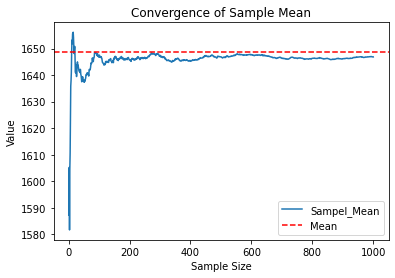

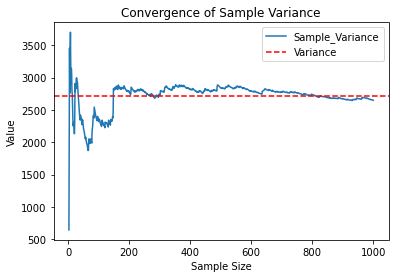

In [83]:
My_stock.Show_Convergence() 

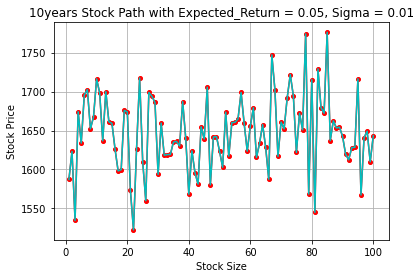

In [84]:
My_stock.Show_Histogram(10, 5594, 100)

In [85]:
My_stock.Black_Scholes_price(900,1)

블랙숄즈가격 : 143.893518  


In [86]:
My_stock.BookValue_Ratio(10, 5594, 1000, 90)

1년 후의 PER지수는  11.676580로 15보다 작기 때문에 좋지는 않을 것입니다
2년 후의 PER지수는  12.273410로 15보다 작기 때문에 좋지는 않을 것입니다
3년 후의 PER지수는  12.901191로 15보다 작기 때문에 좋지는 않을 것입니다
4년 후의 PER지수는  13.561327로 15보다 작기 때문에 좋지는 않을 것입니다
5년 후의 PER지수는  14.255404로 15보다 작기 때문에 좋지는 않을 것입니다
6년 후의 PER지수는  14.985127로 15보다 작기 때문에 좋지는 않을 것입니다
7년 후의 PER지수는 15.752300로 15보다 크기 때문에 좋아 보입니다
8년 후의 PER지수는 16.558830로 15보다 크기 때문에 좋아 보입니다
9년 후의 PER지수는 17.406725로 15보다 크기 때문에 좋아 보입니다
10년 후의 PER지수는 18.298097로 15보다 크기 때문에 좋아 보입니다
